In [1]:
from sklearn import svm
import pandas as pd
from sklearn import model_selection
from sklearn import metrics

In [2]:
#手写字母识别数据
letters = pd.read_csv(r'letterdata.csv')
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
predictors = letters.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(letters[predictors], letters.letter, 
                                                                 test_size = 0.25, random_state = 1234)

In [4]:
# 使用网格搜索法，选择线性可分SVM“类”中的最佳C值
#C=[0.05,0.1,0.5,1,2,5]
C=[0.05]
parameters = {'C':C}
grid_linear_svc = model_selection.GridSearchCV(estimator = svm.LinearSVC(),param_grid =parameters,scoring='accuracy',cv=5,verbose =1)
grid_linear_svc.fit(X_train,y_train)
grid_linear_svc.best_params_, grid_linear_svc.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Libli

({'C': 0.05}, 0.689)

In [5]:
#线性的评分
pred_linear_svc = grid_linear_svc.predict(X_test)
metrics.accuracy_score(y_test, pred_linear_svc)

0.7136

In [6]:
# 使用网格搜索法，选择非线性SVM“类”中的最佳C值
kernel=['rbf','linear','poly','sigmoid']
C=[0.1,0.5,1,2,5]
parameters = {'kernel':kernel,'C':C}
grid_svc = model_selection.GridSearchCV(estimator = svm.SVC(),param_grid =parameters,scoring='accuracy',cv=5,verbose =1)
grid_svc.fit(X_train,y_train)
grid_svc.best_params_, grid_svc.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.0min finished


({'C': 5, 'kernel': 'rbf'}, 0.9516666666666665)

In [7]:
#非线性的评分
pred_svc = grid_svc.predict(X_test)
metrics.accuracy_score(y_test,pred_svc)

0.9596

In [8]:
# 森林火灾数据
forestfires = pd.read_csv(r'forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
forestfires.drop('day',axis = 1, inplace = True)
# 将月份作数值化处理
forestfires.month = pd.factorize(forestfires.month)[0]
forestfires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


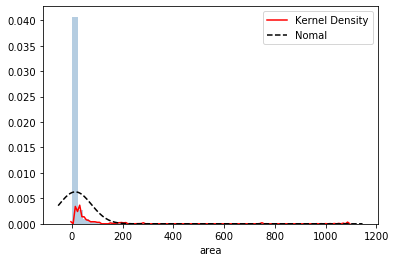

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# 绘制森林烧毁面积的直方图
sns.distplot(forestfires.area, bins = 50, kde = True, fit = norm, hist_kws = {'color':'steelblue'}, 
             kde_kws = {'color':'red', 'label':'Kernel Density'}, 
             fit_kws = {'color':'black','label':'Nomal', 'linestyle':'--'})
plt.legend()
plt.show()

In [11]:
from sklearn import preprocessing
import numpy as np
# 对area变量作对数变换
y = np.log1p(forestfires.area)
# 将X变量作标准化处理
predictors = forestfires.columns[:-1]
X = preprocessing.scale(forestfires[predictors])

In [12]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [13]:
# 构建默认参数的SVM回归模型
svr = svm.SVR()
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
# MSE
metrics.mean_squared_error(y_test,pred_svr)

1.9268192310372876

In [14]:
# 网格搜索法，选择SVM回归中的最佳C值、epsilon值和gamma值
epsilon = np.arange(0.1,1.5,0.2)
C= np.arange(100,1000,200)
gamma = np.arange(0.001,0.01,0.002)
parameters = {'epsilon':epsilon,'C':C,'gamma':gamma}
grid_svr = model_selection.GridSearchCV(estimator = svm.SVR(),param_grid =parameters,
                                        scoring='neg_mean_squared_error',cv=5,verbose =1, n_jobs=2)
grid_svr.fit(X_train,y_train)
print(grid_svr.best_params_, grid_svr.best_score_)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 300 tasks      | elapsed:    5.4s


{'C': 300, 'epsilon': 1.1000000000000003, 'gamma': 0.001} -1.9946668196316621


[Parallel(n_jobs=2)]: Done 875 out of 875 | elapsed:   19.7s finished


In [15]:
pred_grid_svr = grid_svr.predict(X_test)
# 计算模型在测试集上的MSE值
metrics.mean_squared_error(y_test,pred_grid_svr)

1.7455012238826595